In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
# geodata source
gd_src = '../geodata/{}/{}-c005-s010-vw-pr.geojson'

# name corrected data source
nc_src = '../well_data/src_data.csv'

In [3]:
geodata = gpd.read_file(gd_src.format('mou', 'mou'))
wells = pd.read_csv(nc_src)

<GeoAxesSubplot: >

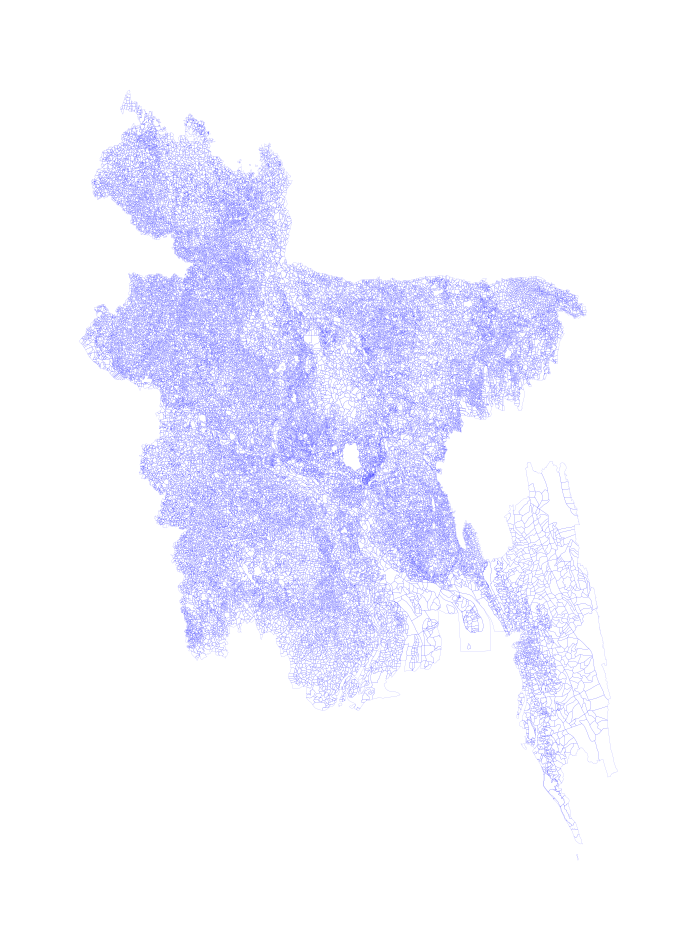

In [9]:
gplt.polyplot(
    geodata, 
    projection=gcrs.AlbersEqualArea(), 
    edgecolor='blue', 
    linewidth=0.05,
    figsize=(12,12)
)

9550
=====
24501    Abda Hossainpur
13248        Abdul Mahal
49594         Abdul Nabi
1353         Abdullahpur
10788        Abdullahpur
              ...       
45807               Afra
47637               Afra
53271               Afra
49047          Afsarkhil
30588           Ag Deoli
Name: mou, Length: 100, dtype: object
=====


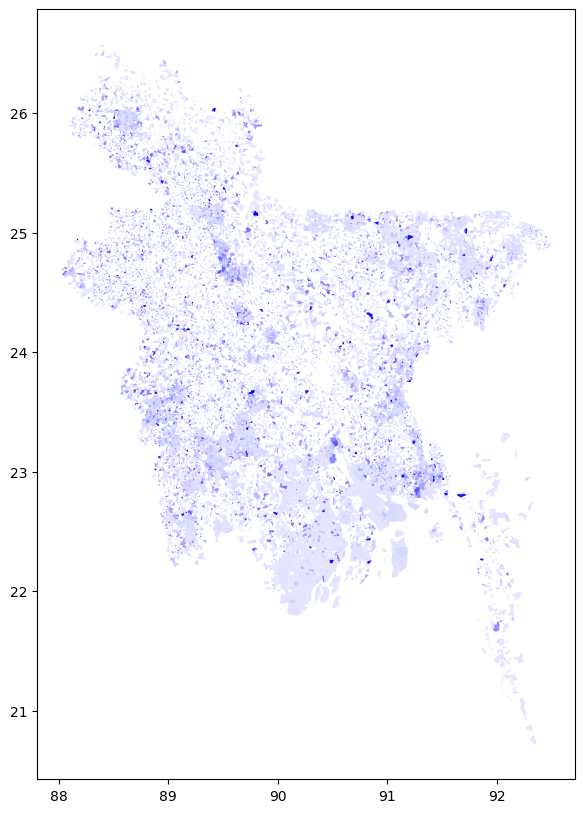

In [8]:
def chittagong_color_count(well_data):
    print(well_data['mou'].unique().size)
    print('=====')
    agg_functions = {"depth": "count"}
    div_agg_depth_as = well_data.groupby(well_data["mou"]).aggregate(agg_functions)
    div_agg_depth_as["count"] = well_data.groupby(well_data["mou"]).size()

    merged = pd.merge(div_agg_depth_as, geodata, left_index=True, right_on="mou")
    
    gd_merged = gpd.GeoDataFrame(merged)
    
    scaler = MinMaxScaler(feature_range=(0.1, 1))
    gd_merged["count_scaled"] = scaler.fit_transform(gd_merged[["count"]])
    
    print(gd_merged['mou'].head(100))
    print('=====')

    gd_merged.plot(
        color="blue",
        alpha=gd_merged["count_scaled"],
        figsize=(10,10)
    )
    
    return
    
    # code from https://stackoverflow.com/questions/38899190/geopandas-label-polygons

chittagong_color_count(wells)